In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol


In [15]:
multi_linear_emulator = np.load('linear_emulator_five_outputs.npz')
beta = multi_linear_emulator['beta']
intercept = multi_linear_emulator['intercept']

### Conduct sensitivity analysis of linear emulator

In [16]:
n_runs =  100
# Read Input Data
df_x = pd.read_csv(f'../Emulation/Input/input_{n_runs}.csv')

# Select relevant inputs only
relevant_columns = []
for col in df_x.columns:
    relevant_columns.append(col)
    if col == 'T': break

#columns_with_multiple_values = df_x.nunique() > 1
#filtered_input = df_x.loc[:, columns_with_multiple_values]

# Select only first 5 inputs 
filtered_input = df_x[relevant_columns]

filtered_input

,# svn.c,pat.r,pat.c,rv.E_act,T
0,27.687002,0.443723,3.278327,1.623082,0.478369
1,10.935100,0.243385,4.286711,2.717826,0.805784
2,18.671167,0.356841,2.549143,0.822205,0.950488
3,24.992088,0.155291,5.101243,3.333386,0.614289
4,22.700741,0.326891,3.862239,2.779415,0.551895
...,...,...,...,...,...
95,27.406567,0.196824,3.333852,1.704984,0.646159
96,26.960391,0.395660,2.043640,0.645535,0.810764
97,10.379113,0.271468,5.547834,3.156299,0.473453
98,17.956148,0.327547,3.782205,1.440794,0.618088


In [17]:
## SaLib user inteerface
from SALib import ProblemSpec 

# Import emulator to np array
beta_matrix = np.array(beta)
intercept = np.array(intercept)

# Ensure intercept has the correct shape
intercept = intercept.reshape(-1)  # Flatten to (5,) if it's (5, 1)


# Define a `dict` defining the number of inputs, the names of the inputs, and the bounds on each input:
problem = ProblemSpec({
    'num_vars': len(relevant_columns),
    'names': relevant_columns,
    'bounds' : filtered_input[relevant_columns].describe().loc[['min', 'max']].T.values,
    "outputs" : ["PC1", "PC2", "PC3", "CO", "MaxPress"],
})

# Samples inputs
problem.sample_sobol(1024)
X = problem.samples

# Dynamically determine the shape of Y based on X and beta_matrix
num_samples = X.shape[0]  # Number of rows in X
num_outputs = beta_matrix.shape[1]  # Number of columns in beta_matrix


# Sample outputs 
Y = np.zeros((X.shape[0], num_outputs))  # Initialize Y with the right shape

# Compute Y
for i in range(num_samples):
    Y[i, :] = beta_matrix @ X[i, :] + intercept


# Set output and run analysis
problem.set_results(Y)
problem.analyze_sobol()


/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndar

Samples:
	5 parameters: ['# svn.c', 'pat.r', 'pat.c', 'rv.E_act', 'T']
	12288 samples
Outputs:
	5 outputs: ['PC1', 'PC2', 'PC3', 'CO', 'MaxPress']
	12288 evaluations
Analysis:
PC1:
                ST   ST_conf
# svn.c   0.034312  0.002899
pat.r     0.893355  0.064328
pat.c     0.028358  0.002502
rv.E_act  0.009433  0.000759
T         0.034313  0.002978:
                S1   S1_conf
# svn.c   0.034274  0.015426
pat.r     0.893337  0.070819
pat.c     0.028347  0.016307
rv.E_act  0.009431  0.007021
T         0.034329  0.015715:
                           S2   S2_conf
(# svn.c, pat.r)     0.000067  0.029244
(# svn.c, pat.c)     0.000043  0.022287
(# svn.c, rv.E_act)  0.000035  0.022269
(# svn.c, T)         0.000035  0.022498
(pat.r, pat.c)       0.000277  0.084331
(pat.r, rv.E_act)    0.000275  0.081069
(pat.r, T)           0.000003  0.079823
(pat.c, rv.E_act)    0.000013  0.020376
(pat.c, T)           0.000013  0.021570
(rv.E_act, T)        0.000003  0.010417:
PC2:
                ST   ST

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndar

<Axes: title={'center': 'MaxPress'}>

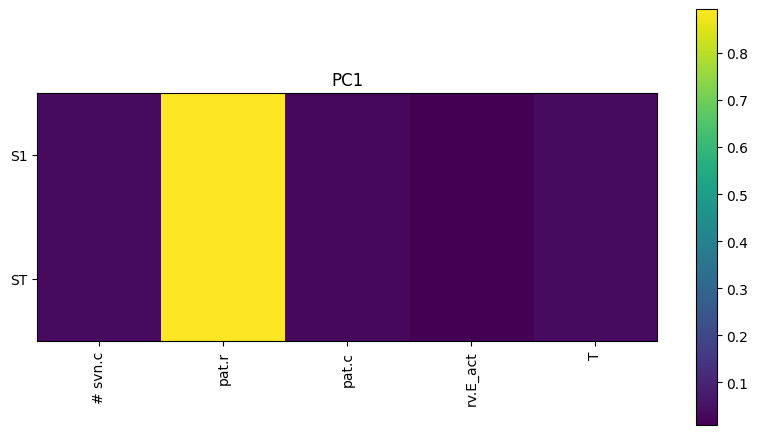

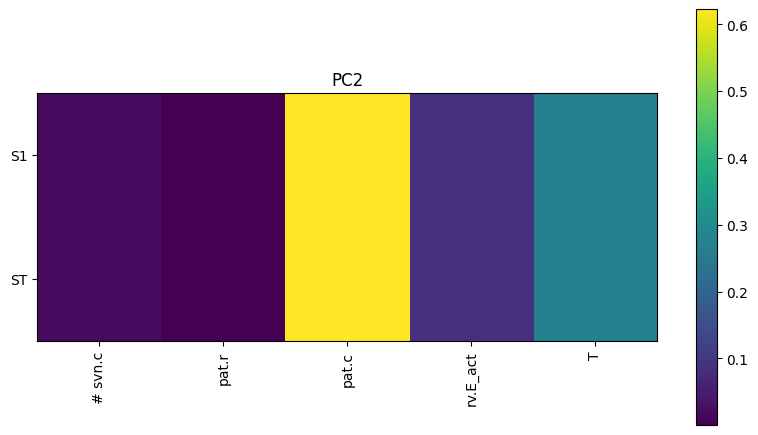

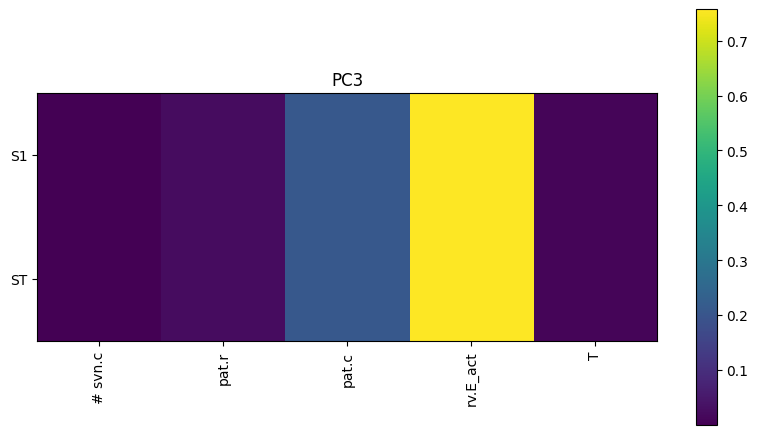

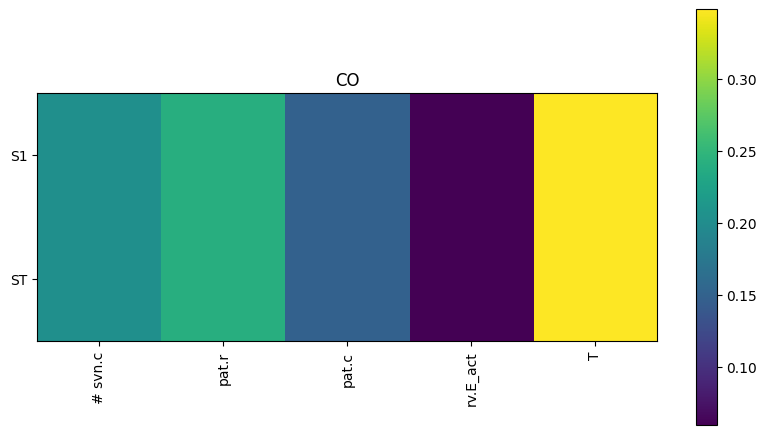

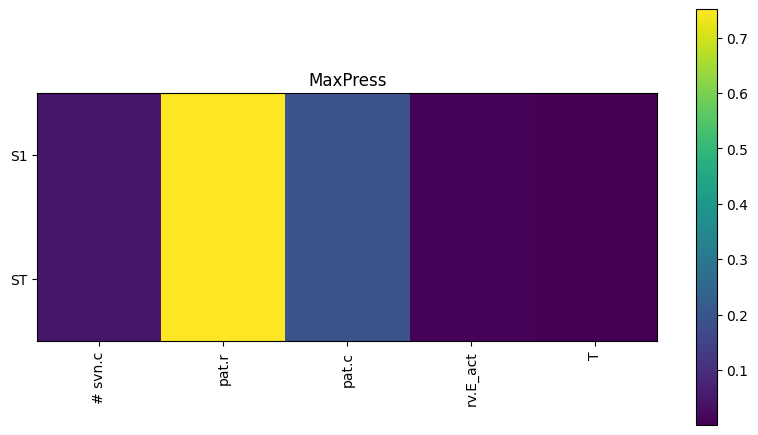

In [18]:
problem.heatmap('PC1')
problem.heatmap('PC2')
problem.heatmap('PC3')
problem.heatmap('CO')
problem.heatmap('MaxPress')


In [19]:
X.shape

(12288, 5)

In [20]:
sobol_indices_pca = sobol.analyze(problem, Y_pca1, calc_second_order=True)

ST = pd.DataFrame(sobol_indices_pca['ST'], index=relevant_columns, columns=['ST'])
ST.sort_values('ST', inplace=True, ascending=False)

labels = ST.index
sizes = ST['ST']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
plt.title('Sensitivity Analysis Results')
plt.show()

NameError: name 'Y_pca1' is not defined